# Load Data

The objectives of this notebook are:
* Load the Cov-19 relevant datasets
* Clean this dataset
* Explore the *Argentina* related dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
# import plotly.express as px
#import theme

%matplotlib inline

<based on this notebook "https://notebooks.ai/rmotr-curriculum/covid-19-40c03c06/Part+2.ipynb">_

## Load data

In [2]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
covid_confirmed = pd.read_csv(COVID_CONFIRMED_URL)

COVID_DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
covid_deaths = pd.read_csv(COVID_DEATHS_URL)

COVID_RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
covid_recovered = pd.read_csv(COVID_RECOVERED_URL)

## Clean data

Tables that we have just read, contain information in _wide_ format, this is a list of countries, with their confirmed/recovered/lethal cases per date as columns.

The confirmed table looks just like this:

In [4]:
covid_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Bermuda,United Kingdom,32.3078,-64.7505,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
464,NaN,Chad,15.4542,18.7322,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
465,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
466,NaN,Fiji,-17.7134,178.0650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


This is why we need to **UNpivot** the tables, so they take a _long_ format, and they have a row per date

In [6]:
covid_confirmed_long = pd.melt(covid_confirmed,
                               id_vars=covid_confirmed.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')

covid_deaths_long = pd.melt(covid_deaths,
                               id_vars=covid_deaths.iloc[:, :4],
                               var_name='date',
                               value_name='deaths')

covid_recovered_long = pd.melt(covid_recovered,
                               id_vars=covid_recovered.iloc[:, :4],
                               var_name='date',
                               value_name='recovered')

In [7]:
covid_confirmed_long

,Province/State,Country/Region,Lat,Long,date,confirmed
0,NaN,Thailand,15.0000,101.0000,1/22/20,2
1,NaN,Japan,36.0000,138.0000,1/22/20,2
2,NaN,Singapore,1.2833,103.8333,1/22/20,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0
...,...,...,...,...,...,...
27139,Bermuda,United Kingdom,32.3078,-64.7505,3/19/20,2
27140,NaN,Chad,15.4542,18.7322,3/19/20,1
27141,NaN,El Salvador,13.7942,-88.8965,3/19/20,1
27142,NaN,Fiji,-17.7134,178.0650,3/19/20,1


Now, we would like to complete the columns to each country/region so they have the _confirmed, recovered and deaths_ columns.

In [8]:
covid_df = covid_confirmed_long
covid_df['deaths'] = covid_deaths_long['deaths']
covid_df['recovered'] = covid_recovered_long['recovered']

We could make explicit the information regarding the disease status of **ACTIVE**, so we have information of the number of cases **able to spread Cov-19**.

In [9]:
covid_df['active'] = covid_df['confirmed'] - covid_df['deaths'] - covid_df['recovered']


In [10]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,2
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,2
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,0


In [11]:
covid_df['Country/Region'].replace('Mainland China', 'China', inplace=True)
covid_df[['Province/State']] = covid_df[['Province/State']].fillna('')
covid_df.fillna(0, inplace=True)


Save the data in new tables.

In [27]:
covid_df.to_csv('covid_df.csv', index=None)

In [28]:
# check file is OK
# pd.read_csv('covid_df.csv')

Now we aggregate the data by Country/Region

In [18]:
covid_countries_df = covid_df.groupby(['Country/Region', 'Province/State']).max().reset_index()

In [19]:
covid_countries_df

,Country/Region,Province/State,Lat,Long,date,confirmed,deaths,recovered,active
0,Afghanistan,,33.0000,65.0000,3/9/20,22,0,1,21
1,Albania,,41.1533,20.1683,3/9/20,64,2,0,62
2,Algeria,,28.0339,1.6596,3/9/20,87,9,32,55
3,Andorra,,42.5063,1.5218,3/9/20,53,0,1,52
4,Antigua and Barbuda,,17.0608,-61.7964,3/9/20,1,0,0,1
...,...,...,...,...,...,...,...,...,...
463,Uruguay,,-32.5228,-55.7658,3/9/20,79,0,0,79
464,Uzbekistan,,41.3775,64.5853,3/9/20,23,0,0,23
465,Venezuela,,6.4238,-66.5897,3/9/20,42,0,0,42
466,Vietnam,,16.0000,108.0000,3/9/20,85,0,16,69


In [20]:
covid_countries_df = covid_countries_df.groupby('Country/Region').sum().reset_index()

In [21]:
# remove unused Lon and Lat
covid_countries_df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [22]:
covid_countries_df

,Country/Region,confirmed,deaths,recovered,active
0,Afghanistan,22,0,1,21
1,Albania,64,2,0,62
2,Algeria,87,9,32,55
3,Andorra,53,0,1,52
4,Antigua and Barbuda,1,0,0,1
...,...,...,...,...,...
150,Uruguay,79,0,0,79
151,Uzbekistan,23,0,0,23
152,Venezuela,42,0,0,42
153,Vietnam,85,0,16,69


In [23]:
top_10_confirmed = covid_countries_df.sort_values(by='confirmed', ascending=False).head(10)

top_10_confirmed

,Country/Region,confirmed,deaths,recovered,active
30,China,81157,3249,70535,60003
73,Italy,41035,3405,4440,33190
69,Iran,18407,1284,5710,11413
133,Spain,17963,830,1107,16026
57,Germany,15320,44,113,15163
146,US,14194,222,24,13968
53,France,10947,243,12,10692
79,"Korea, South",8565,91,1540,7577
138,Switzerland,4075,41,15,4019
149,United Kingdom,2716,138,67,2514


### Explore data per country
Now we can explore the information we have making individual plots per region

In [24]:
covid_countries_date_df = covid_df.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()


In [25]:
covid_arg = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']

In [26]:
covid_arg.head()

,Country/Region,date,Lat,Long,confirmed,deaths,recovered,active
60,Argentina,1/22/20,-38.4161,-63.6167,0,0,0,0
215,Argentina,1/23/20,-38.4161,-63.6167,0,0,0,0
370,Argentina,1/24/20,-38.4161,-63.6167,0,0,0,0
525,Argentina,1/25/20,-38.4161,-63.6167,0,0,0,0
680,Argentina,1/26/20,-38.4161,-63.6167,0,0,0,0


Plot: evolucion en argentina

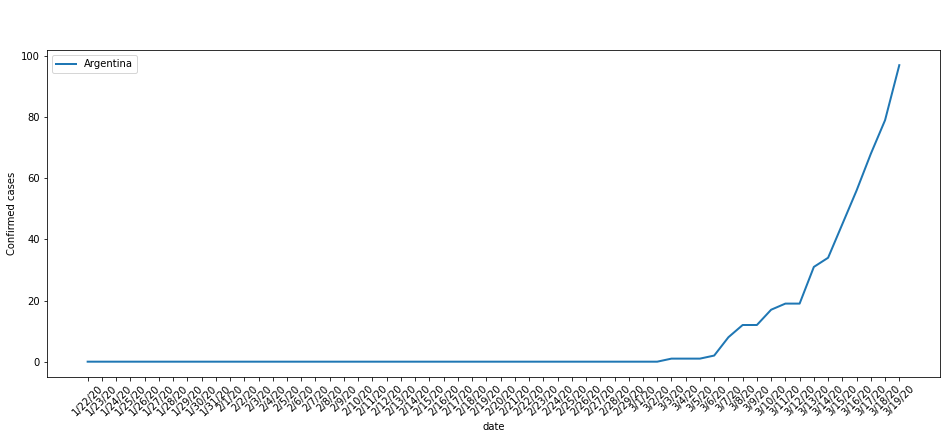

In [27]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)
plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases')

ax.legend(['Argentina', 'World except China'])

plt.show()

Plot: evolucion en Argentina en escala logaritmica

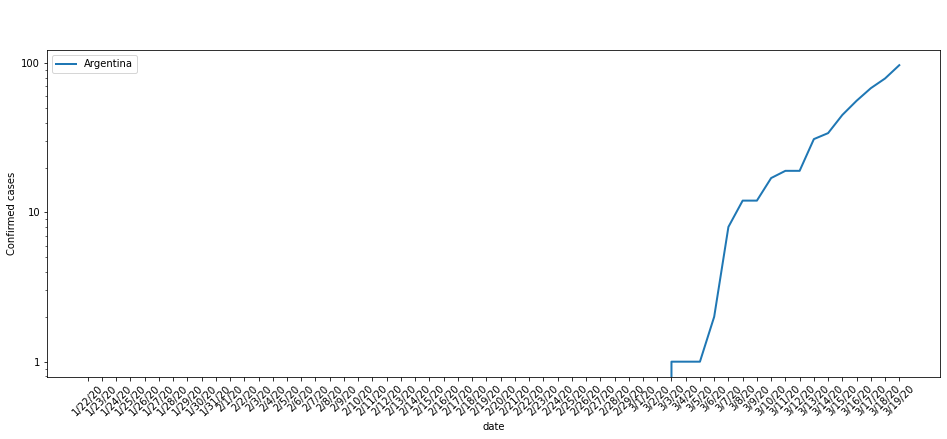

In [28]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

plt.xticks(rotation=45)
plt.ylabel('Confirmed cases')

ax.legend(['Argentina'])

plt.show()

## Comparemos con otros paises

In [57]:
covid_arg = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Argentina']
covid_chile = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Chile']
covid_esp = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Spain']
covid_ita = covid_countries_date_df[covid_countries_date_df['Country/Region'] == 'Italy']

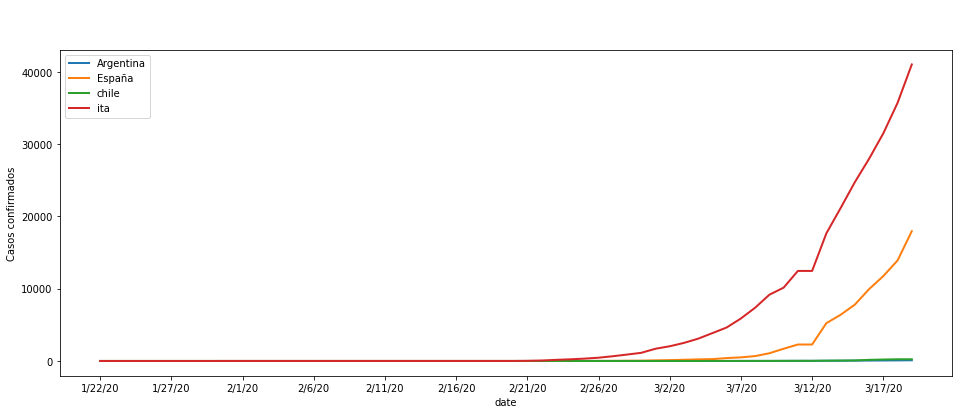

In [58]:
fig, ax = plt.subplots(figsize=(16, 6))
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=covid_arg['date'], y=covid_arg['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_esp['date'], y=covid_esp['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_chile['date'], y=covid_chile['confirmed'], sort=False, linewidth=2)

sns.lineplot(x=covid_ita['date'], y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [59]:
t = []
d0 = datetime.datetime.strptime("1/1/20", '%m/%d/%y')
for d in covid_ita['date']:
    elapsed_days = (datetime.datetime.strptime(d, '%m/%d/%y') - d0).days
    t.append(elapsed_days)

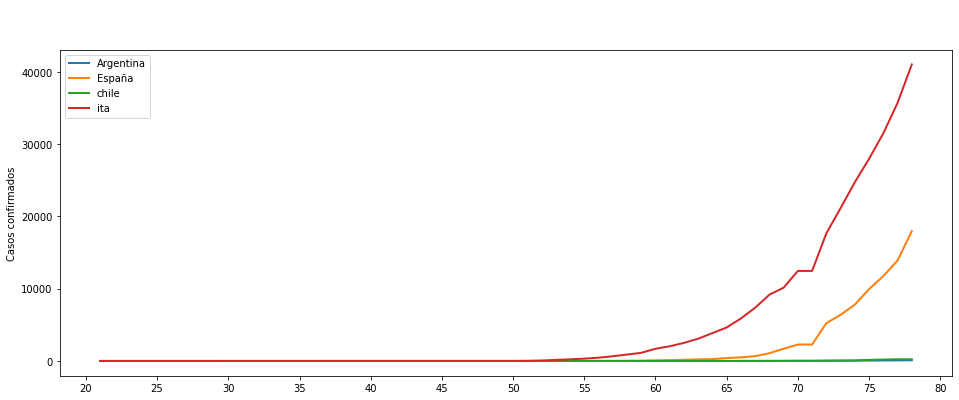

In [60]:
fig, ax = plt.subplots(figsize=(16, 6))
#ax.set(yscale="log")
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=t, y=covid_arg['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_esp['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_chile['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t, y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [61]:
z = covid_arg['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_arg = t - patient_zero

z = covid_ita['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_ita = t - patient_zero

z = covid_chile['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_chile = t - patient_zero

z = covid_esp['confirmed']
patient_zero = z.to_numpy().nonzero()[0][0]
t_esp = t - patient_zero

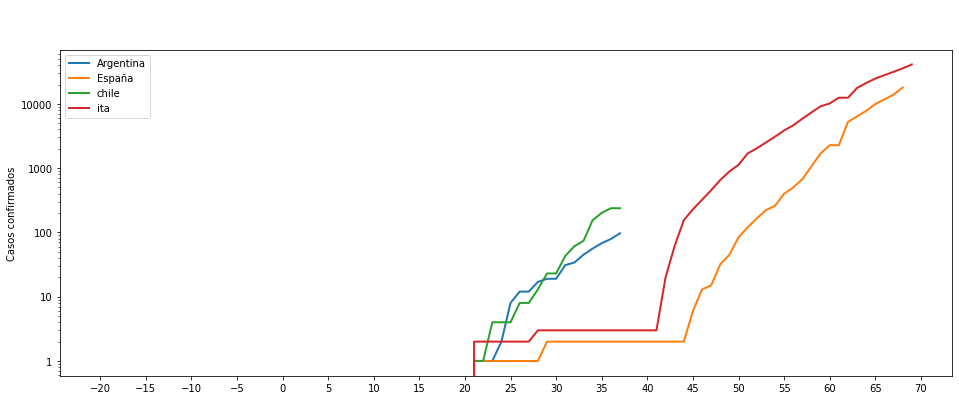

In [62]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))

sns.lineplot(x=t_arg, y=covid_arg['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_esp, y=covid_esp['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_chile, y=covid_chile['confirmed'], sort=False, linewidth=2)
sns.lineplot(x=t_ita, y=covid_ita['confirmed'], sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()

In [63]:
df_world = pd.read_csv('../dat/pop_area.csv')

In [65]:
pais = 'Spain'
popu_esp = df_world[df_world['country'] == pais]['population'].values[0]
area_esp = df_world[df_world['country'] == pais]['area'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [56]:
pais = 'Chile'
popu_chile = df_world[df_world['country'] == pais]['population'].values[0]
area_chile = df_world[df_world['country'] == pais]['area'].values[0]

pais = 'Argentina'
popu_arg = df_world[df_world['country'] == pais]['population'].values[0]
area_arg = df_world[df_world['country'] == pais]['area'].values[0]

pais = 'Italy'
popu_ita = df_world[df_world['country'] == pais]['population'].values[0]
area_ita = df_world[df_world['country'] == pais]['area'].values[0]

In [40]:
y_arg = covid_arg['confirmed'] / popu_arg * 1.e6
y_chile = covid_chile['confirmed'] / popu_chile * 1.e6

y_esp = covid_esp['confirmed'] / popu_esp * 1.e6
y_ita = covid_ita['confirmed'] / popu_ita * 1.e6

ValueError: operands could not be broadcast together with shapes (58,) (0,) 

NameError: name 'y_esp' is not defined

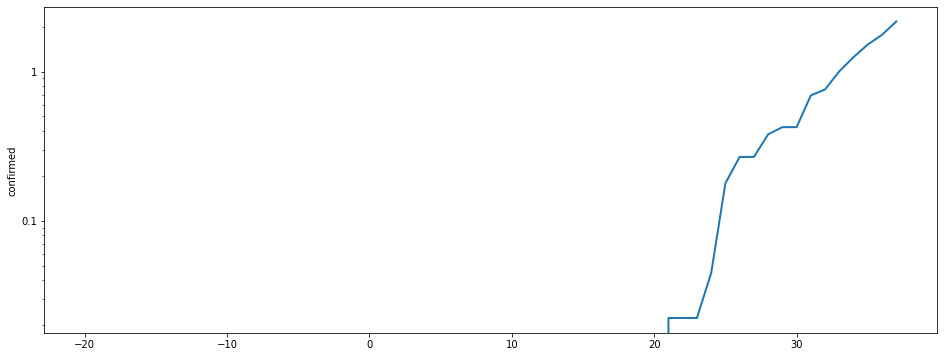

In [41]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set(yscale="log")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
sns.lineplot(x=t_arg, y=y_arg, sort=False, linewidth=2)
sns.lineplot(x=t_esp, y=y_esp, sort=False, linewidth=2)
sns.lineplot(x=t_chile, y=y_chile, sort=False, linewidth=2)
sns.lineplot(x=t_ita, y=y_ita, sort=False, linewidth=2)

plt.suptitle("COVID-19 per country cases over the time", fontsize=16, fontweight='bold', color='white')
plt.title("(logarithmic scale)", color='white')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(rotation=0)
plt.ylabel('Casos confirmados por millón de habitantes')

ax.legend(['Argentina', 'España', 'chile', 'ita'])

plt.show()